### Проект по курсу "Системы имитационного моделирования":
#### "Мобильная кофейня с  уникальными точками обслуживания и складом запасов"

__Постановка задачи__:

Существует некоторая экономическая среда __`E`__, в которой есть __`N`__- торговых зон, где можно ставить мобильную точку обслуживания. Есть некоторый агент __`A`__- мобильная кофейня\шаверма на углях\цветочная лавка (точка обслуживания), которая может перемещаться по этим зонам и предлагать свои услуги. Между торговыми зонами, а также от каждой зоны  до склада перемещение требует времени. Ресурсы для исполнения заказов ограничены,  при их исчерпании мобильной точке необходимо посещать склад, обслуживание не может быть осуществлено в течение времени передвижения, а также загрузки ресурсов со склада соответственно. 

Торговые зоны и склад обслуживания удобно представить в виде неориентированного графа. По умолчанию распределение времени между выставлением и исполнением заказов моделей покупателей и агента соответственно имеет показательный закон с параметром $\frac{1}{p}$, где $p:=\{t_{\mu}, t_{\lambda}-$ среднее время выставления и исполнения заказа соответственно. В каждом узле графа, где перемещается агент, задана своя модель поведения покупателя. Задано время передвижения между узлами (торговыми зонами и складом). Среднее время между поступлением заказов для модели потребителя зависит от времени суток. Форму зависимости можно определить beta-распределением с параметрами $\alpha, \beta$, включена дополнительная случайная компонента $\varepsilon \sim N(0, \sigma_{\varepsilon})$. Среднее время осуществления агентом обслуживания также имеет случайную компоненту $\upsilon \sim N(0, \sigma_{\upsilon})$. Чтобы избежать возможных ситуаций со случайным появлением неположительного среднего времени, $\sigma_{\varepsilon}$, $\sigma_{\upsilon}$ устанавливаются в размере не более `5%` от заданных средних значений времени.


__Цели в рамках поставленной задачи:__

Найти лучшую стратегию действий агента относительно:
   1. Уровня выручки 
   2. Уровня колебаний выручки
   
   при ограничениях:
    * заданных моделей поведения потребителей
    * на ресурсы агента
    * на затраты времени на перемещение между узлами
    * на затраты времени на пополнение ресурсов агента

Для решения задачи строится имитационная модель, включающая элементы агентного и дискретно-событийного методов имитационного моделирования.


__Верификация модели:__

Рассмотренны признаки адекватности итоговой имитационной модели:


   1. Обратная зависимость между средним интервалом времени от заказа к заказу и общим количеством полученных заказов.
   2. Обратная зависимость между средним временем обслуживания и общим числом обслуженных заказов.
   3. Динамика среднего интервала времени от заказа к заказу соответствует заданному закону в модели покупателя.
   4. Динамика среднего времени обслуживания заказа агентом соответствует заданному закону.
   5. Изменение местоположения агента во времени в соответствии с заданной стратегией.
   6. Поток заказов по каждому из узлов графа по графику близок к учебному графику пуассоновского процесса потока заявок.
   7. Отсутствие deadlock-ов ([Deadlocks](https://en.wikipedia.org/wiki/Deadlock)) модели.

---
Для работы имитационной модели используется модельное время. Модельная секунда соответствует реальной секунде __`S*(1/n)`__, где __`n`__ - масштаб соотношения реальной и модельной секунды.

__Основные классовые объекты:__

 1. __`MobileAgent`__.      Мобильный агент-передвигаемая точка обслуживания.
 2. __`PossibleCustomer`__. Покупатель. Используются k экземпляров класса для k моделей покупателя - уникальной для каждой точки реализации.
 3. __`ClaimsAggregator`__. Сборщик требования и статистики в процессе симуляции.
 4. __`ModelEnvironment`__. Общие параметры среды, в которой работает агент.
 5. __`Logs`__. Запись событий в процессе симуляции.

__Созданные стратегии работы агента__: 
   1. В заданные интервалы модельного времени - __по заданному плану__.
   
   
   2. По достижении $\Delta-$выручки на текущей точке реализации и переключение на следующую случайным образом - __диверсификация клиентских сегментов__.
   
   
   3. По байесовской оценке ситуации - __обучающийся агент__:
   
      `x%` времени обслуживание идет на тех узлах, где апостериорная оценка интенсивности входящего потока наибольшая, `y%` времени - обслуживание со случайным блужданием с целью уточнения оценок интенсивностей входящего потока на каждом узле графа в каждый час суток.
      
      По умолчанию, на старте задаются интенсивности входящих потоков заказов $\lambda_{i}, i=1,..,n$ по априорным распределениям с добавленным шумом. Известно, что число событий, происходящих за фиксированное время, моделируются вероятностным распределением дискретного типа $Poissson(\lambda)$, где параметр $\lambda$ - среднее значение этой интенсивности соответственно. Кроме этого, известны априорные знания по распределению параметра $\lambda$. Априорные знания об интенсивностях входящих потоков заказов на каждом узле в каждый час соответствуют распределению $Gamma(\alpha, \beta)$ [gamma distribution on en.wiki](https://en.wikipedia.org/wiki/Gamma_distribution). Параметры данного распределения в форме $\alpha, \beta$ (есть и другое представление) имеют __физический смысл__: $\alpha$ - __общее число произошедших событий в $\beta$ известных интервалах__. Дополнительно, почему выбрано такое распределение: [conjugate prior on en.wiki](https://en.wikipedia.org/wiki/Conjugate_prior) $Gamma(\alpha, \beta)$ - сопряженное распределение к $Poisson(\lambda)$ поможет провести быстрый расчет параметров апостериорного распределения интенсивностей входящего потока на каждом узле за каждый час. Таким образом, стратегия агента заключается в его обучении на вновь поступающих данных по известным почасовым объемам заказов в узлах графа по формуле Байеса:
      
$$\begin{equation}\label{eq:Bayesian_rule}  
p(\theta|D)=\frac{p(D|\theta)p(\theta)}{\int p(D|\theta)p(\theta)d\theta}=\frac{p(D|\theta)p(\theta)}{p(D)}=\frac{likelihood \cdot prior}{evidence}
\end{equation}$$

Следовательно, используя функции плотностей вероятностей заданных распределений, производим оценку параметра $\lambda$ при условии поступаемой единицы данных $x$:
$$P(\lambda|x)=\frac{Poisson(\lambda|x)Gamma(\alpha, \beta|\lambda)}{\int_{0}^{\infty} Poisson(\lambda|x)Gamma(\alpha, \beta|\lambda)d\lambda}=P(\lambda|x)=\frac{Poisson(\lambda|x)Gamma(\alpha, \beta|\lambda)}{\int_{0}^{\infty} Poisson(\lambda|x)Gamma(\alpha, \beta|\lambda)d\lambda}=\frac{\frac{e^{-\lambda}\lambda^{x}}{x!}\frac{\beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}}{\int_{0}^{\infty}\frac{e^{-\lambda}\lambda^{x}}{x!}\frac{\beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}d\lambda}$$, где $\Gamma(\alpha)-$гамма-функция.

Для упрощения вычислений преобразуем знаменатель-evidence:

$${\int_{0}^{\infty}\frac{e^{-\lambda}\lambda^{x}}{x!}\frac{\beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}d\lambda}=\frac{\Gamma(\alpha+x)(1+\beta)^{\alpha+x}\beta^{\alpha}}{\Gamma(\alpha+x)(1+\beta)^{\alpha+x}x!\Gamma(\alpha)}\int_{0}^{\infty}\lambda^{\alpha+x-1}e^{-\lambda(1+\beta)}d\lambda
=\frac{\Gamma(\alpha+x)\beta^{\alpha}}{(1+\beta)^{\alpha+x}x!\Gamma(\alpha)}\int_{0}^{\infty}\frac{(1+\beta)^{\alpha+x}\lambda^{\alpha+x-1}e^{-\lambda(1+\beta)}}{\Gamma(\alpha+x)}d\lambda$$

Тогда, апостериорная плотность вероятности:
$$P(\lambda|x)=\frac{\frac{e^{-\lambda}\lambda^{x}}{x!}\frac{\beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}}{\int_{0}^{\infty}\frac{e^{-\lambda}\lambda^{x}}{x!}\frac{\beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}d\lambda}=\frac{\frac{e^{-\lambda}\lambda^{x}}{x!}\frac{\beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}}{\frac{\Gamma(\alpha+x)\beta^{\alpha}}{(1+\beta)^{\alpha+x}x!\Gamma(\alpha)}}=\frac{e^{-\lambda}\lambda^{x}}{x!}\frac{\beta^{\alpha}\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}\frac{(1+\beta)^{\alpha+x}x!\Gamma(\alpha)}{\Gamma(\alpha+x)\beta^{\alpha}}=\frac{(1+\beta)^{\alpha+x}\lambda^{(\alpha+x)-1}e^{-\lambda(1+\beta)}}{\Gamma(\alpha+x)}=Gamma(\alpha+x, 1+\beta)$$

Таким образом, для $n$ новых наблюдений агента, апостериорная плотность вероятности: $Gamma(\alpha+\sum_{i=1}^{n}x_{i}, n+\beta)$. Оценка параметра $\hat{\lambda}$ может быть получена с помощью матожидания: $$\hat{\lambda}=\frac{\alpha+\sum_{i=1}^{n}x_{i}}{n+\beta},$$  которое выглядит как оценка MLE параметра $\lambda$ распределения $Poisson$ с дополнительным штрафом на основе априорных представлений об оцениваемом параметре. [Ответ, почему это так](https://www.statlect.com/fundamentals-of-statistics/Poisson-distribution-maximum-likelihood)



      
      
      
      
      
---    
    INFO:
       По умолчанию доступны следующие распределения временных интервалов между заявками/обслуживанием:

       1. random.betavariate - beta-распределение
       2. random.expovariate - показательное распределение
       3. random.gammavariate- gamma-распределение
       4. random.lognormvariate- логнормальное распределение
       5. random.normalvariate - нормальное распределение
       6. random.paretovariate - распределение Парето
       7. random.vonmisesvariate- распределение von Mises
       8. random.weibullvariate - распределение Вейбулла

        Используется: random.expovariate
---

In [1]:
# Libraries

import os
import sys
import copy
import tqdm
import time
import random
import datetime
import threading
import logging

import scipy.stats as st
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go

import visdom_utils as vu
import utils as ut

from sim_env import environment as senv
from sim_env import customer 
from sim_env import mobagent 


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

In [2]:
# Масштаб времени
# 1 Реальная секунда = n Модельных => Модельная секунда = 1/n Реальной
scale_coef = 3600  # 216000 час 3600 минута
model_second = 1 / scale_coef

mutex = threading.Lock()
random.seed(1)

In [3]:
# Названия узлов
point_labels = {1:'1st', 2:'2nd', 3:'3d', 4:'Stock'}

# Задание графа точек и склада с затратами времени на переход
# mean_time - среднее время на переход между узлами
mat  = [    (1, 2, {'mean_time': 10*60}),
            (1, 3, {'mean_time': 10*60}),
            (1, 3, {'mean_time': 10*60}),
            (1, 4, {'mean_time': 10*60}),
            (2, 3, {'mean_time': 10*60}),
            (2, 4, {'mean_time': 15*60}),
            (3, 4, {'mean_time': 15*60})
        ]

Setting up a new session...


2021-12-08 00:10:53.965271 Visdom connection: default
Visdom plots:
2021-12-08 00:10:54.083572 claims_plot
2021-12-08 00:10:55.587921 done_claims_plot
2021-12-08 00:10:57.101541 missed_claims_plot
2021-12-08 00:10:58.613475 agent_resources
2021-12-08 00:11:00.118286 agent_service_time
2021-12-08 00:11:01.622337 customer_models
2021-12-08 00:11:03.130308 revenue_plot
2021-12-08 00:11:04.637527 total_revenue


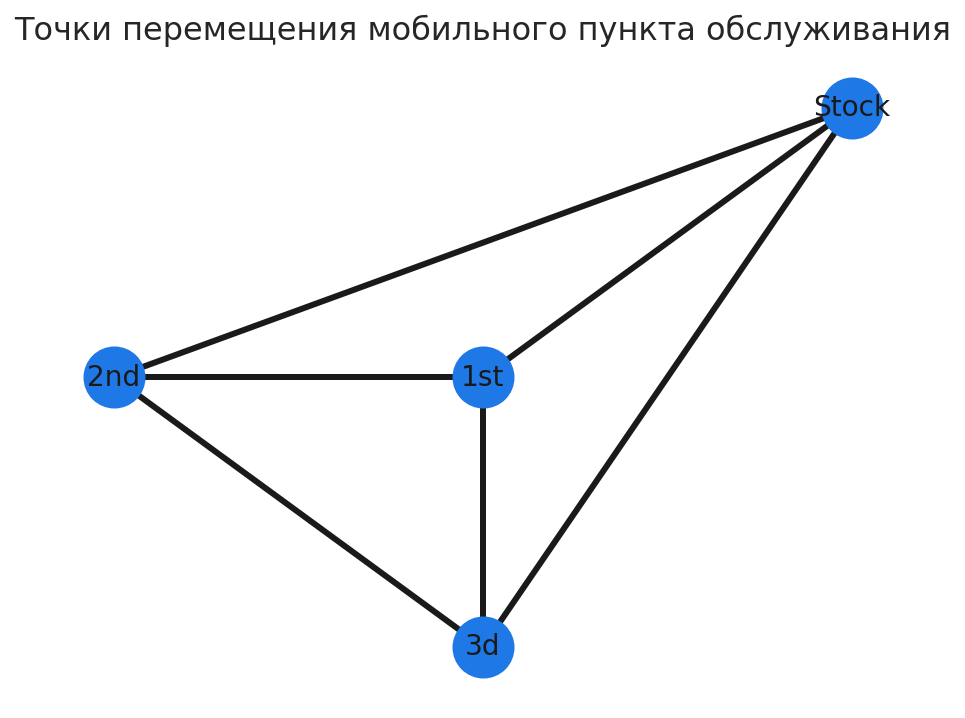

In [4]:
# Инициализация среды, интерактивных графиков
environment_instance = senv.ModelEnvironment(mat, 
                                             point_labels,
                                             scale_coef,
                                             print_logs_flag=True)
environment_instance.pos = {1:[1,1], 2:[0,1], 3:[1,0], 4:[2,2]}
environment_instance.plot_env_graph()

# Параметры, описывающие поведение клиентов в заданных узлах графа
customer_params =   [{'name':'Customer Model 1',
                     'position':1,
                     'model_sec':model_second,
                     'patience_sec':600,
                     'between_claims_sec':10,
                     'spacings_law':{'a':5, 'b':6}},
                     
                     {'name':'Customer Model 2',
                     'position':2,
                     'model_sec':model_second,
                     'patience_sec':1000,
                     'between_claims_sec':80,
                     'spacings_law':{'a':2, 'b':5}},
                     
                     {'name':'Customer Model 3',
                     'position':3,
                     'model_sec':model_second,
                     'patience_sec':1200,
                     'between_claims_sec':100,
                     'spacings_law':{'a':5, 'b':2}}
                    ]
customer_params = [dict(**x, **{'mutex': mutex, 'scale_coef': scale_coef}) for x in customer_params]
# Параметры, описывающие мобильного экономического агента
# strategy_flag: position_strategy
#                delta_strategy
#                bayes_rule
mobile_agent_params = {'start_position':1,
                       'time_between_service_sec':70,
                       'capacity':200,
                       'eps_capacity':10,
                       'price':1,
                       'model_sec':model_second,
                       'env_graph':environment_instance.env_graph,
                       'customer_nodes':3,
                       'stock_update':200,
                       'stock_lag':20*60,
                       'behaviour':{'rest_time_hours':(22, 7),
                                    'service_time':{'a':0.5, 'b':12}},
                       
                       
                       'position_strategy':[{'timeline':0,       'move_node':1},
                                            {'timeline':8*3600,  'move_node':2},
                                            {'timeline':16*3600, 'move_node':3}],
                       'delta_revenue':50,
                       
                       'determined_work_hours_frac': 0.7,
                       
                       'bayes_prior':{'a':500, 'b':1},
        
                       'strategy_flag': 'bayes_rule',
                       
                       'mutex': mutex, 
                       'scale_coef': scale_coef,
                      
                      }



In [5]:
# Инициализация моделей поведения клиентов
customer_types = [customer.PossibleCustomer(**kwarg) for kwarg in customer_params]
# Инициализация экономического агента
mobile_agent = mobagent.MobileAgent(**mobile_agent_params)

# Инициализация сборщика требований
claims_aggregator_params = {'init_agent_pos':mobile_agent_params['start_position'],
                            'init_agent_capacity':mobile_agent_params['capacity'],
                            'init_agent_behaviour':mobile_agent_params['behaviour'],
                            'customer_nodes':3,
                            'mutex': mutex, 
                            'scale_coef': scale_coef
                           }
claims_aggr_instance = senv.ClaimsAggregator(**claims_aggregator_params)

============Agent strategy: bayes_rule============


Расчет зависимости интервалов между заказами от суточного времени
Node 1


100%|██████████████████████████████████| 86400/86400 [00:06<00:00, 13855.61it/s]


Node 2


100%|██████████████████████████████████| 86400/86400 [00:06<00:00, 13875.18it/s]


Node 3


100%|██████████████████████████████████| 86400/86400 [00:06<00:00, 13649.01it/s]


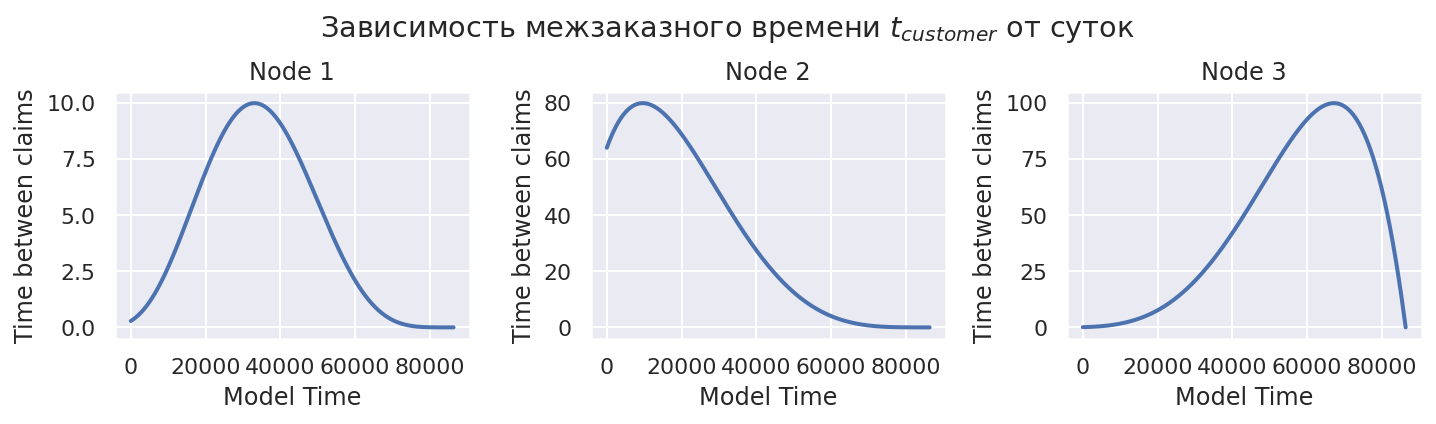

In [6]:
# Для информации: зависимости интервалов между заказами от суточного времени
nodes_time_dependent_coefs = {1:{'mean':customer_params[0]['between_claims_sec'], 'a':5, 'b':6},
                              2:{'mean':customer_params[1]['between_claims_sec'], 'a':2, 'b':5},
                              3:{'mean':customer_params[2]['between_claims_sec'], 'a':5, 'b':2}}
ut.plot_time_between_claims(ut.get_time_arrays_dict(nodes_time_dependent_coefs))

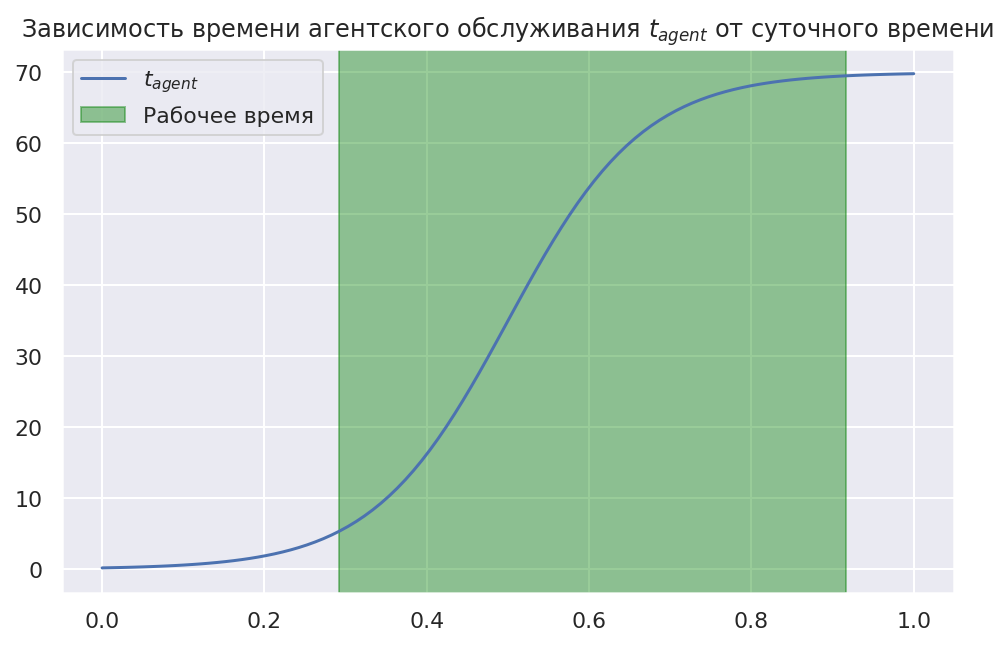

In [7]:
# Для информации: зависимость среднего времени обслуживания агента от времени
ut.plot_agent_service_time((mobile_agent_params['behaviour']['rest_time_hours'][1]/24,
                            mobile_agent_params['behaviour']['rest_time_hours'][0]/24), 
                            mobile_agent_params['time_between_service_sec'], 
                            mobile_agent_params['behaviour']['service_time']['a'],
                            mobile_agent_params['behaviour']['service_time']['b'])

In [8]:
# Запуск симуляции
simulation_kwargs = {'total_time':24*5,
                     'customer_types': customer_types,
                     'claims_aggregator': claims_aggr_instance,
                     'mobile_agent': mobile_agent,
                     'logs':ut.Logs()}
environment_instance.run_simulation(**simulation_kwargs)

Real time limit: [120 sec]
Model time limit [432000 sec][120.0 hour]
INFO:root:================================Start Simulation================================
INFO:root:-----------------Day: 1-----------------
INFO:root:[PossibleCustomer: Customer Model 1] Spacings law: {'a': 5, 'b': 6}
INFO:root:[PossibleCustomer: Customer Model 2] Spacings law: {'a': 2, 'b': 5}
INFO:root:[PossibleCustomer: Customer Model 3] Spacings law: {'a': 5, 'b': 2}


Model time passed: 0:   0%|          | 0/120 [00:00<?, ?it/s]

INFO:root:[MobileAgent][25144.97]Агент начинает работу.
INFO:root:[MobileAgent][25457.389] Передвижение 1->3.
INFO:root:[MobileAgent] Do nothing: 600 model sec
INFO:root:[MobileAgent][30645.126] Передвижение 3->1.
INFO:root:[MobileAgent] Do nothing: 600 model sec
INFO:root:[MobileAgent][34227.767] Передвижение 1->2.
INFO:root:[MobileAgent] Do nothing: 600 model sec
INFO:root:[MobileAgent][37928.16] Передвижение 2->1.
INFO:root:[MobileAgent] Do nothing: 600 model sec
INFO:root:[MobileAgent][41424.728] Передвижение 1->2.
INFO:root:[MobileAgent] Do nothing: 600 model sec
INFO:root:[MobileAgent][46377.832]Внимание. Ресурсов осталось: 10
INFO:root:[MobileAgent][46377.832] Передвижение 2->Склад.
INFO:root:[MobileAgent] Do nothing: 900 model sec
INFO:root:[MobileAgent][46377.832]Пополнение ресурсов.
INFO:root:[MobileAgent] Do nothing: 1200 model sec
INFO:root:[MobileAgent][46377.832]Ресурсы пополнены. Наличие:210
INFO:root:[MobileAgent][46377.832] Передвижение Склад->2.
INFO:root:[MobileAgent

INFO:root:[MobileAgent][25806.845]Пополнение ресурсов.
INFO:root:[MobileAgent] Do nothing: 1200 model sec
INFO:root:[MobileAgent][25806.845]Ресурсы пополнены. Наличие:210
INFO:root:[MobileAgent][25806.845] Передвижение Склад->2.
INFO:root:[MobileAgent][29380.464] Передвижение 2->1.
INFO:root:[MobileAgent] Do nothing: 600 model sec
INFO:root:[MobileAgent][38124.878] Передвижение 1->3.
INFO:root:[MobileAgent] Do nothing: 600 model sec
INFO:root:[MobileAgent][41404.111] Передвижение 3->2.
INFO:root:[MobileAgent] Do nothing: 600 model sec
INFO:root:[MobileAgent][45251.932] Передвижение 2->1.
INFO:root:[MobileAgent] Do nothing: 600 model sec
INFO:root:[MobileAgent][48620.754] Передвижение 1->2.
INFO:root:[MobileAgent] Do nothing: 600 model sec
INFO:root:[MobileAgent][51121.512]Внимание. Ресурсов осталось: 10
INFO:root:[MobileAgent][51121.512] Передвижение 2->Склад.
INFO:root:[MobileAgent] Do nothing: 900 model sec
INFO:root:[MobileAgent][51121.512]Пополнение ресурсов.
INFO:root:[MobileAgent

#### Прогоны имитационной модели

In [ ]:
def make_n_runs(n, simulation_days, strategy, point_labels, mat, rest_hours):
    """
    Сделать n прогонов имитационной модели
    """
    df_out = pd.DataFrame([])
    df_list = []
    multiplepbar = tqdm.tqdm_notebook(total=n, desc=f'[{n}] simulation runs', position=0, leave=True)
    for it in range(n):
        # random.seed(i)
        # Инициализация среды
        environment_instance = senv.ModelEnvironment(mat, point_labels, scale_coef,
                                                     print_logs_flag=False, visdom=False)
        environment_instance.pos = {1:[1,1], 2:[0,1], 3:[1,0], 4:[2,2]}
        # environment_instance.plot_env_graph()

        # Параметры, описывающие поведение клиентов в заданных узлах графа
        customer_params =   [{'name':'Customer Model 1',
                             'position':1,
                             'model_sec':model_second,
                             'patience_sec':600,
                             'between_claims_sec':10,
                             'spacings_law':{'a':5, 'b':6}},

                             {'name':'Customer Model 2',
                             'position':2,
                             'model_sec':model_second,
                             'patience_sec':1000,
                             'between_claims_sec':80,
                             'spacings_law':{'a':2, 'b':5}},

                             {'name':'Customer Model 3',
                             'position':3,
                             'model_sec':model_second,
                             'patience_sec':1200,
                             'between_claims_sec':100,
                             'spacings_law':{'a':5, 'b':2}}
                            ]
        customer_params = [dict(**x, **{'mutex': mutex, 'scale_coef': scale_coef}) for x in customer_params]
        # Параметры, описывающие мобильного экономического агента
        mobile_agent_params = {'start_position':1,
                               'time_between_service_sec':70,
                               'capacity':200,
                               'eps_capacity':10,
                               'price':1,
                               'model_sec':model_second,
                               'env_graph':environment_instance.env_graph,
                               'customer_nodes':3,
                               'stock_update':200,
                               'stock_lag':20*60,
                               'behaviour':{'rest_time_hours':(rest_hours[0], rest_hours[1]),
                                            'service_time':{'a':0.5, 'b':12}},


                               'position_strategy':[{'timeline':0,       'move_node':1},
                                                    {'timeline':8*3600,  'move_node':2},
                                                    {'timeline':16*3600, 'move_node':3}],
                               'delta_revenue':50,

                               'determined_work_hours_frac': 0.7,

                               'bayes_prior':{'a':500, 'b':1},

                               'strategy_flag': strategy,
                               
                               'mutex': mutex, 
                               'scale_coef': scale_coef,
                              
                              }

        # Инициализация моделей поведения клиентов
        customer_types = [customer.PossibleCustomer(**kwarg) for kwarg in customer_params]
        # Инициализация экономического агента
        mobile_agent = mobagent.MobileAgent(**mobile_agent_params)
        # Инициализация сборщика требований
        claims_aggregator_params = {'init_agent_pos':mobile_agent_params['start_position'],
                                    'init_agent_capacity':mobile_agent_params['capacity'],
                                    'init_agent_behaviour':mobile_agent_params['behaviour'],
                                    'customer_nodes':3,
                                    'mutex': mutex, 
                                    'scale_coef': scale_coef
                                   }
        claims_aggr_instance = senv.ClaimsAggregator(**claims_aggregator_params)
        # Общие параметры менеджера симуляций
        simulation_kwargs = {'total_time':24*simulation_days+1e-5,
                             'customer_types': customer_types,
                             'claims_aggregator': claims_aggr_instance,
                             'mobile_agent': mobile_agent,
                             'logs':ut.Logs()}
        environment_instance.run_simulation(**simulation_kwargs)
        
        while claims_aggr_instance.stop_simulation==False:
            continue
        logging.shutdown()
        
        # Данные по симуляции
        # print(f'Данные по симуляции: {it}')
        tmp = claims_aggr_instance.revenue_statistic.copy(deep=True)
        df_tmp = preprocess_sim_stat(tmp)
        df_tmp['simulation'] = it
        # Добавление данных в итоговую таблицу
        df_out = df_out.append(df_tmp,sort=False)
        df_list.append(tmp)
        
        multiplepbar.update(1)
    df_out.reset_index(inplace=True, drop=True)
    return df_out, df_list

In [ ]:
def preprocess_sim_stat(claims_aggr_instance_data):
    """
    Предобработка данных после итерации симуляции
    """
    df = claims_aggr_instance_data.copy(deep=True)
    
    df['model_hour'] = df['model_time']/3600
    df['model_hour'] = df['model_hour'].apply(lambda x:round(x))
    df['dot_revenue'] = df['revenue'] - df['revenue'].shift(1).fillna(0)

    df['dot_node_claims_loss'] = df['node_claims_loss'] - df['node_claims_loss'].shift(1).fillna(0)
    df['dot_claims_done'] = df['claims_done'] - df['claims_done'].shift(1).fillna(0)

    tmp = df.copy(deep=True)
    tmp.loc[tmp['model_hour']==24, 'model_hour'] = 0
    tmp = pd.DataFrame(tmp.groupby(['model_day','model_hour'])['dot_revenue'].sum()).reset_index()
    tmp['day_hour'] = tmp['model_day'].astype(str)+'d '+tmp['model_hour'].astype(str)+':00'
    return tmp

In [ ]:
def plot_revenue_stat(df_out):
    """
    График колебания выручки агента по итогам симуляции
    """
    tmp = pd.DataFrame(df_out.groupby(['model_day', 'model_hour'])['dot_revenue'].mean()).reset_index()
    tmp_min = pd.DataFrame(df_out.groupby(['model_day','model_hour'])['dot_revenue'].min()).reset_index()
    tmp_max = pd.DataFrame(df_out.groupby(['model_day','model_hour'])['dot_revenue'].max()).reset_index()
    tmp['dot_revenue_min'] = tmp_min['dot_revenue']
    tmp['dot_revenue_max'] = tmp_max['dot_revenue']
    tmp['day_hour'] = tmp['model_day'].astype(str) + ' d, ' + tmp['model_hour'].astype(str)+' h'
    
    upper_bound = go.Scatter(
        name='Upper Bound',
        x=tmp['day_hour'],
        y=tmp['dot_revenue_max'],
        mode='lines',
        line=dict(width=0.5,color="#4a545c", dash='dash'),
        opacity=0.3
                    )

    lower_bound = go.Scatter(
            name='Lower Bound',
            x=tmp['day_hour'],
            y=tmp['dot_revenue_min'],
            mode='lines',
            line=dict(width=0.5, color="#4a545c", dash='dash'),
            fillcolor='rgba(68, 68, 68, 0.1)',
            fill='tonexty',opacity=0.3)

    trace = go.Scatter(
                    name = 'Mean',
                    x=tmp['day_hour'],
                    y=tmp['dot_revenue'],
                    line=dict(width=0.8, color="#4169e1"),
                    opacity=0.9
                    )

    data = [upper_bound, lower_bound, trace]

    fig = go.Figure(data = data)
    fig.update_layout(title="Почасовая динамика выручки агента",
                      xaxis_title='День, Час', yaxis_title='Выручка',
                      xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
def plot_revenue_boxplot(df_out):
    """
    График ящика с усами для симулируемой выручки агента
    """
    df_bxplot = pd.DataFrame(df_out.groupby(['simulation'])['dot_revenue'].sum())
    sns.boxplot(y="dot_revenue", data=df_bxplot)
    mean, std = df_bxplot['dot_revenue'].mean(), df_bxplot['dot_revenue'].std()
    print(f'Mean: {round(mean,2)} Std: {round(std,2)}')
    plt.show()

In [ ]:
def boxplots(df_out1, df_out2, df_out3, plow=0.1, phigh=1.05):
    df_boxplots = [pd.DataFrame(x.groupby(['simulation'])['dot_revenue'].sum()) for x in [df_out1, df_out2, df_out3]]
    for tab, strategy in zip(df_boxplots,
                             ['position_strategy', 'delta_strategy', 'bayes_rule']):
        tab.rename(columns={'dot_revenue': f'revenue_{strategy}'}, inplace=True)
    df_general = pd.concat(df_boxplots, axis=1)
    
    maxval = max(df_general.values.reshape(-1,).tolist())
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))
    for ax in axes:
        ax.set_ylim((plow*maxval, phigh*maxval))

    for y_name, title, ax in zip(['position_strategy','delta_strategy', 'bayes_rule'],
                                 ['Position strategy', 'Delta strategy', 'Bayes rule'],
                                 [x for x in axes]):        
        sns.boxplot(y=f'revenue_{y_name}', data=df_general, ax=ax)
        ax.set_title(title, fontsize=12)
    plt.suptitle('Agent Revenue', fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

---

#### 1. Рабочий день 8 часов с 9 до 17, 10 прогонов по 3 суток

Возможные стратегии агента: `position_strategy`, `delta_strategy`, `bayes_rule`.

---

Cтратегия: `position_strategy`

---

In [ ]:
df_out1, _ = make_n_runs(10, 3, 'position_strategy', point_labels, mat, (17,9))
# df_out1.to_csv('df_out1.csv',index=False)
# df_out1 = pd.read_csv('df_out1.csv')
plot_revenue_stat(df_out1)
plot_revenue_boxplot(df_out1)

---

Cтратегия: `delta_strategy`

---

In [ ]:
df_out2, _ = make_n_runs(10, 3, 'delta_strategy', point_labels, mat, (17,9))
# df_out2.to_csv('df_out2.csv',index=False)
# df_out2 = pd.read_csv('df_out2.csv')
plot_revenue_stat(df_out2)
plot_revenue_boxplot(df_out2)

---

Cтратегия: `bayes_rule`

---

In [ ]:
df_out3, _ = make_n_runs(10, 3, 'bayes_rule', point_labels, mat, (17,9))
# df_out3.to_csv('df_out3.csv',index=False)
# df_out3 = pd.read_csv('df_out3.csv')
plot_revenue_stat(df_out3)
plot_revenue_boxplot(df_out3)

In [ ]:
boxplots(df_out1, df_out2, df_out3)

#### Без отдыха, 10 прогонов по 3 суток

In [ ]:
df_out1_1, _ = make_n_runs(10, 3, 'position_strategy', point_labels, mat, (24,0))
# df_out1_1.to_csv('df_out1_1.csv',index=False)
# df_out1_1 = pd.read_csv('df_out1_1.csv')
plot_revenue_stat(df_out1_1)
plot_revenue_boxplot(df_out1_1)

df_out2_1, _ = make_n_runs(10, 3, 'delta_strategy', point_labels, mat, (24,0))
# df_out2_1.to_csv('df_out2_1.csv',index=False)
# df_out2_1 = pd.read_csv('df_out2_1.csv')
plot_revenue_stat(df_out2_1)
plot_revenue_boxplot(df_out2_1)

df_out3_1, _ = make_n_runs(10, 3, 'bayes_rule', point_labels, mat, (24,0))
# df_out3_1.to_csv('df_out3_1.csv',index=False)
# df_out3_1 = pd.read_csv('df_out3_1.csv')
plot_revenue_stat(df_out3_1)
plot_revenue_boxplot(df_out3_1)

In [ ]:
boxplots(df_out1_1, df_out2_1, df_out3_1)

#### 2.	Рабочий день 8 часов с 9 до 17, 10 прогонов по 7 суток

In [ ]:
df_out1_2, _ = make_n_runs(10, 7, 'position_strategy', point_labels, mat, (17,9))
# df_out1_2.to_csv('df_out1_2.csv',index=False)
# df_out1_2 = pd.read_csv('df_out1_2.csv')
plot_revenue_stat(df_out1_2)
plot_revenue_boxplot(df_out1_2)

df_out2_2, _ = make_n_runs(10, 7, 'delta_strategy', point_labels, mat, (17,9))
# df_out2_2.to_csv('df_out2_2.csv',index=False)
# df_out2_2 = pd.read_csv('df_out2_2.csv')
plot_revenue_stat(df_out2_2)
plot_revenue_boxplot(df_out2_2)

df_out3_2, _ = make_n_runs(10, 7, 'bayes_rule', point_labels, mat, (17,9))
# df_out3_2.to_csv('df_out3_2.csv',index=False)
# df_out3_2 = pd.read_csv('df_out3_2.csv')
plot_revenue_stat(df_out3_2)
plot_revenue_boxplot(df_out3_2)

In [ ]:
boxplots(df_out1_2, df_out2_2, df_out3_2)

#### Без отдыха, 10 прогонов по 7 суток

In [ ]:
df_out1_3, _ = make_n_runs(10, 7, 'position_strategy', point_labels, mat, (24,0))
# df_out1_3.to_csv('df_out1_3.csv',index=False)
# df_out1_3 = pd.read_csv('df_out1_3.csv')
plot_revenue_stat(df_out1_3)
plot_revenue_boxplot(df_out1_3)

df_out2_3, _ = make_n_runs(10, 7, 'delta_strategy', point_labels, mat, (24,0))
# df_out2_3.to_csv('df_out2_3.csv',index=False)
# df_out2_3 = pd.read_csv('df_out2_3.csv')
plot_revenue_stat(df_out2_3)
plot_revenue_boxplot(df_out2_3)

df_out3_3, _ = make_n_runs(10, 7, 'bayes_rule', point_labels, mat, (24,0))
# df_out3_3.to_csv('df_out3_3.csv',index=False)
# df_out3_3 = pd.read_csv('df_out3_3.csv')
plot_revenue_stat(df_out3_3)
plot_revenue_boxplot(df_out3_3)

In [ ]:
boxplots(df_out1_3, df_out2_3, df_out3_3)

#### 3. Рабочий день 8 часов с 9 до 17, 3 прогона по 30 суток

In [ ]:
df_out1_4, _ = make_n_runs(3, 30, 'position_strategy', point_labels, mat, (17,9))
# df_out1_4.to_csv('df_out1_4.csv',index=False)
# df_out1_4 = pd.read_csv('df_out1_4.csv')
plot_revenue_stat(df_out1_4)
plot_revenue_boxplot(df_out1_4)

df_out2_4, _ = make_n_runs(3, 30, 'delta_strategy', point_labels, mat, (17,9))
# df_out2_4.to_csv('df_out2_4.csv',index=False)
# df_out2_4 = pd.read_csv('df_out2_4.csv')
plot_revenue_stat(df_out2_4)
plot_revenue_boxplot(df_out2_4)

df_out3_4, _ = make_n_runs(3, 30, 'bayes_rule', point_labels, mat, (17,9))
# df_out3_4.to_csv('df_out3_4.csv',index=False)
# df_out3_4 = pd.read_csv('df_out3_4.csv')
plot_revenue_stat(df_out3_4)
plot_revenue_boxplot(df_out3_4)

In [ ]:
boxplots(df_out1_4, df_out2_4, df_out3_4)

#### Без отдыха, 3 прогноза по 30 суток

In [ ]:
df_out1_5, _ = make_n_runs(3, 30, 'position_strategy', point_labels, mat, (24,0))
# df_out1_5.to_csv('df_out1_5.csv',index=False)
# df_out1_5 = pd.read_csv('df_out1_5.csv')
plot_revenue_stat(df_out1_5)
plot_revenue_boxplot(df_out1_5)

df_out2_5, _ = make_n_runs(3, 30, 'delta_strategy', point_labels, mat, (24,0))
# df_out2_5.to_csv('df_out2_5.csv',index=False)
# df_out2_5 = pd.read_csv('df_out2_5.csv')
plot_revenue_stat(df_out2_5)
plot_revenue_boxplot(df_out2_5)

df_out3_6, _ = make_n_runs(3, 30, 'bayes_rule', point_labels, mat, (24,0))
# df_out3_6.to_csv('df_out3_6.csv',index=False)
# df_out3_6 = pd.read_csv('df_out3_6.csv')
plot_revenue_stat(df_out3_6)
plot_revenue_boxplot(df_out3_6)

In [ ]:
boxplots(df_out1_5, df_out2_5, df_out3_6)

[Если забыли про boxplot](https://hsto.org/files/b73/105/cbf/b73105cbf8a747e4a30564aad68df776.png)